# Visualisation

**Affichage de quelques images**

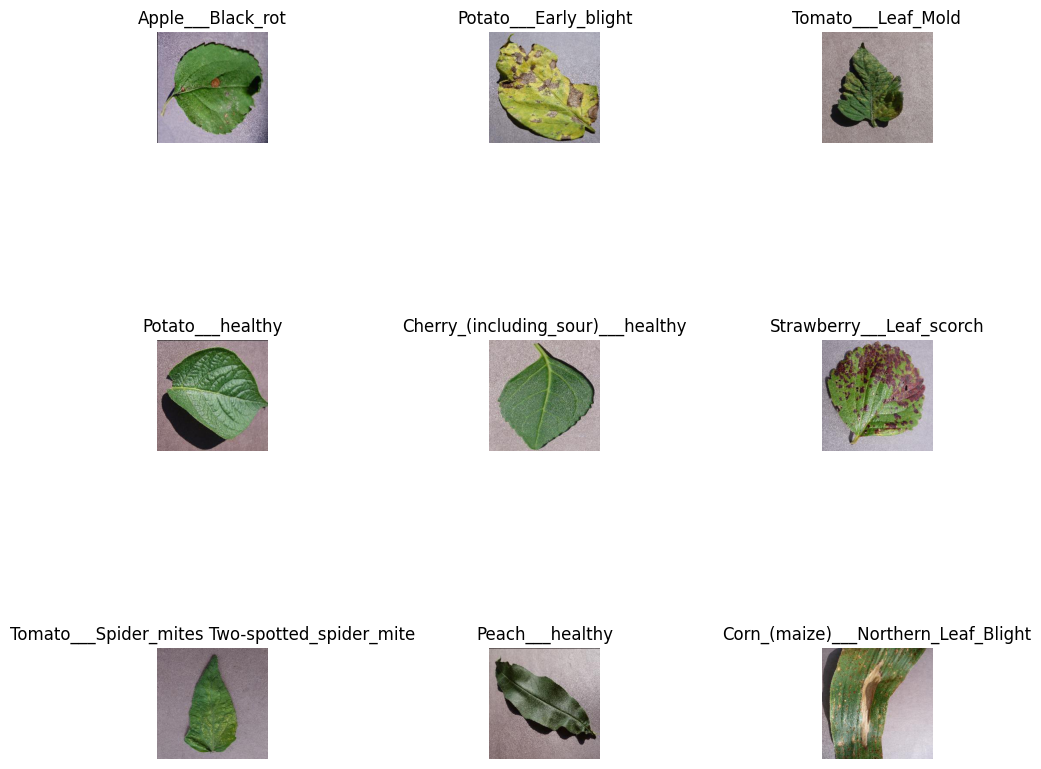

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

path_folder = "/content/drive/MyDrive/Dataset_projet/Maladie sur les plantes/New Plant Diseases/New Plant Diseases Dataset(Augmented)/train"

# Récupérer la liste des dossiers dans le répertoire
folders = os.listdir(path_folder)

# Initialiser une liste pour stocker quelques images aléatoires
random_images = []

# Parcourir chaque dossier et sélectionner une image aléatoire
for folder in folders:
    folder_path = os.path.join(path_folder, folder)
    files = os.listdir(folder_path)
    random_file = random.choice(files)
    image_path = os.path.join(folder_path, random_file)
    random_images.append((image_path, folder))

# Afficher les images aléatoires
fig = plt.figure(figsize=(10, 10))
rows = 3
columns = 3
for i in range(1, rows * columns + 1):
    image_path, folder = random.choice(random_images)
    image = Image.open(image_path)
    fig.add_subplot(rows, columns, i)
    plt.imshow(image)
    plt.axis("off")
    plt.title(folder)

# Ajuster l'espacement entre les sous-graphiques
plt.subplots_adjust(wspace=2, hspace=1)

plt.show()


**Etude sur la Suppression du Background**

Premier test

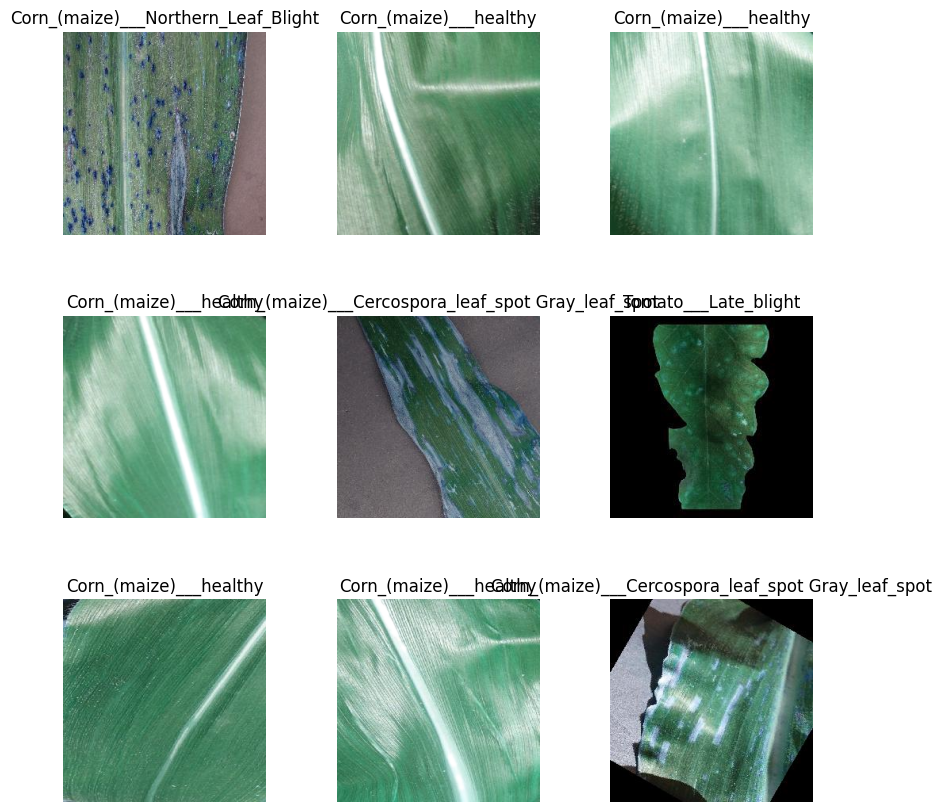

In [ ]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fonction pour supprimer le fond
def remove_background(image_path):
    # Load image
    img = cv2.imread(image_path)

    # Convertir en niveau de gris
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Seuiller l'image pour créer un masque
    mask = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)[1]

    # Inverser le masque
    mask = 255 - mask

    # Appliquer la morphologie pour supprimer le bruit
    kernel = np.ones((3,3), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # Antialiasing du masque
    mask = cv2.GaussianBlur(mask, (0,0), sigmaX=2, sigmaY=2, borderType = cv2.BORDER_DEFAULT)
    mask = (2*(mask.astype(np.float32))-255.0).clip(0,255).astype(np.uint8)

    # Insérer le masque dans le canal alpha
    result = img.copy()
    result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
    result[:, :, 3] = mask

    return result

# Chemin vers le dossier contenant les images
path_folder = "/content/drive/MyDrive/Dataset_projet/Maladie sur les plantes/New Plant Diseases/New Plant Diseases Dataset(Augmented)/train/Apple___Black_rot"

# Liste des dossiers dans le répertoire
folders = os.listdir(path_folder)

# Initialiser une liste pour stocker quelques images aléatoires
random_images = []

# Parcourir chaque dossier et sélectionner une image aléatoire
for folder in folders:
    folder_path = os.path.join(path_folder, folder)
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # Vérifier que le fichier est une image
            if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith(".png"):
                image_path = os.path.join(root, file)
                random_images.append((image_path, folder))

# Sélectionner 9 images aléatoires
random_images = random.sample(random_images, 9)

# Afficher les images
fig = plt.figure(figsize=(10, 10))
rows = 3
columns = 3
for i, (image_path, folder) in enumerate(random_images):
    image = remove_background(image_path)
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(image)
    plt.axis("off")
    plt.title(folder)

# Ajuster l'espacement entre les sous-graphiques
plt.subplots_adjust(wspace=0.2, hspace=0.4)

# Afficher la figure
plt.show()

In [ ]:
# Le module rembg permet de supprimer le fond d'une image automatiquement en utilisant un modèle de réseau de neurones pré-entraîné.
# Il nécessite une installation supplémentaire des bibliothèque rembg, torch, easygui

!pip install rembg
!pip install torch
!pip install easygui


In [ ]:
!pip uninstall -y rembg
!pip install rembg==2.0.36

Found existing installation: rembg 2.0.36
Uninstalling rembg-2.0.36:
  Successfully uninstalled rembg-2.0.36
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached rembg-2.0.36-py3-none-any.whl (23 kB)


In [ ]:
!pip install --upgrade rembg

Second test

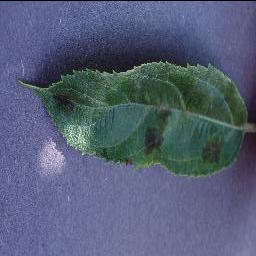

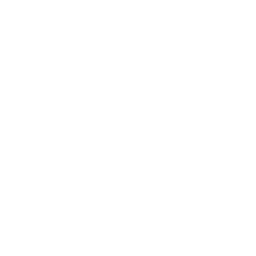

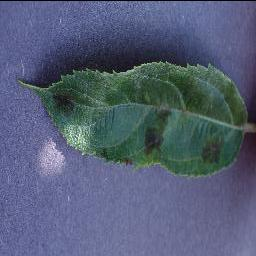

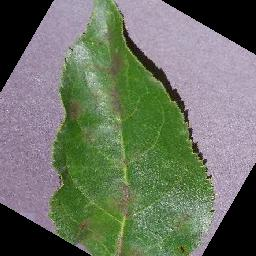

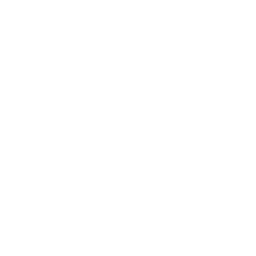

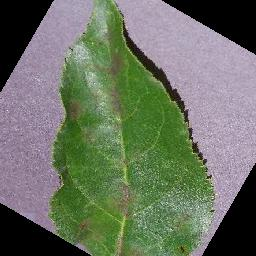

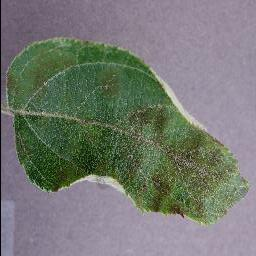

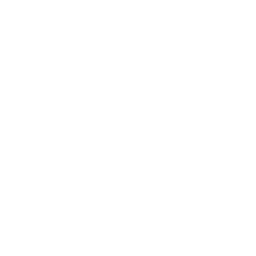

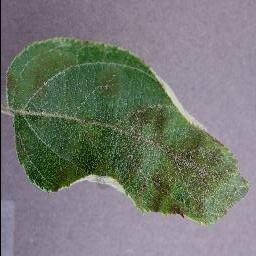

In [ ]:
from google.colab.patches import cv2_imshow
import os
import cv2
import numpy as np

# Définir le chemin du dossier
path_folder = "/content/drive/MyDrive/Dataset_projet/Maladie sur les plantes/New Plant Diseases/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab"

# Récupérer les noms des fichiers d'images dans le dossier
img_files = os.listdir(path_folder)[:3] # les 3 premières images seulement


# Créer une liste vide pour stocker les images
images = []

# Charger chaque image dans la liste
for file in img_files:
    img_path = os.path.join(path_folder, file)
    img = cv2.imread(img_path)
    images.append(img)

    # Conversion en noir et blanc
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Seuillage de l'image en masque
    mask = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)[1]

    # Inversion du masque
    mask = 255 - mask

    # Application d'une morphologie pour retirer les bruits isolés
    # Utilisation de borderconstant en noir car le premier plan touche les bords
    kernel = np.ones((3, 3), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # Antialiasing du masque -- flou puis étirement
    # Flou du canal alpha
    mask = cv2.GaussianBlur(mask, (0, 0), sigmaX=2, sigmaY=2, borderType=cv2.BORDER_DEFAULT)

    # Étirement linéaire pour que 127,5 devienne 0, mais que 255 reste à 255
    mask = (2 * (mask.astype(np.float32)) - 255.0).clip(0, 255).astype(np.uint8)

    # Ajout du masque dans le canal alpha de l'image
    result = img.copy()
    result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
    result[:, :, 3] = mask

    # Enregistrement de l'image résultante avec un fond transparent
    cv2.imwrite(os.path.join(root, "transp_" + file), result)

    # Affichage de l'image originale, du masque et de l'image résultante
    cv2_imshow(img)
    cv2_imshow(mask)
    cv2_imshow(result)

In [ ]:
!pip install easygui

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.7/92.7 kB 4.5 MB/s eta 0:00:00


In [ ]:
!pip install rembg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

Troisième test

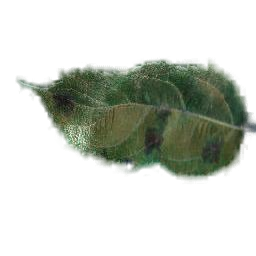

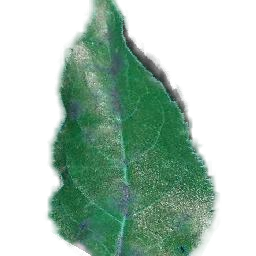

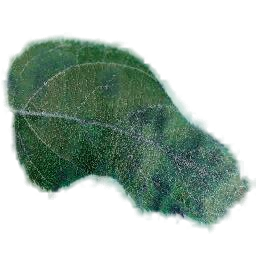

In [ ]:
import os
import cv2
from rembg import remove
from PIL import Image
import numpy as np
from google.colab.patches import cv2_imshow

path_folder = "/content/drive/MyDrive/Dataset_projet/Maladie sur les plantes/New Plant Diseases/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab"

# Récupération des noms de fichiers des trois premières images
files = os.listdir(path_folder)[:3]

# Affichage des images avec le fond supprimé
for file in files:
    image_path = os.path.join(path_folder, file)
    with open(image_path, "rb") as f:
        img = Image.open(f)
        img = img.convert("RGBA")
        # Supprimer le fond de l'image
        img = Image.fromarray(remove(np.array(img), alpha_matting=True))
        # Afficher l'image avec OpenCV
        cv2_imshow(np.array(img))
        cv2.waitKey(0)
        cv2.destroyAllWindows()

Quatrième test

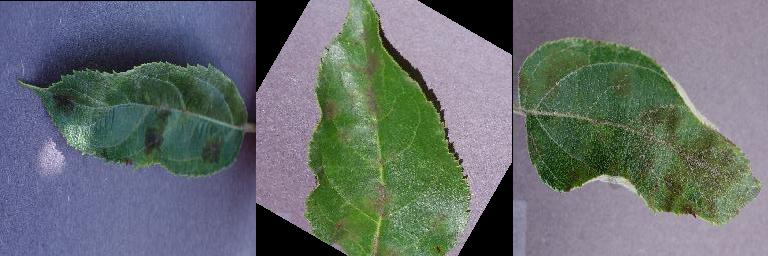

In [ ]:
import cv2
import numpy as np
import os
import random
from google.colab.patches import cv2_imshow

path_folder = "/content/drive/MyDrive/Dataset_projet/Maladie sur les plantes/New Plant Diseases/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab"

# Récupération des noms de fichiers des trois premières images
files = os.listdir(path_folder)[:3]

# Chargement des images
images = []
for path in files:
    img = cv2.imread(os.path.join(path_folder, path))
    if img is not None:
        images.append(img)
    else:
        print(f"Impossible de charger l'image : {path}")

# Création d'une image noire pour servir de fond
if images:
    height, width, channels = images[0].shape
    background = np.zeros((height, width * 3, channels), dtype=np.uint8)

    # Collage des images sur l'image noire
    for i, img in enumerate(images):
        x_offset = i * width
        y_offset = 0
        background[y_offset:y_offset+img.shape[0], x_offset:x_offset+img.shape[1]] = img

    # Affichage de l'image résultante
    cv2_imshow(background)
else:
    print("Aucune image valide trouvée dans le dossier.")

Cinquième test

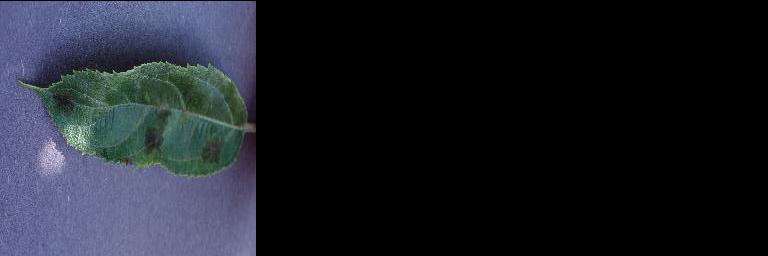

In [ ]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

path_folder = "/content/drive/MyDrive/Dataset_projet/Maladie sur les plantes/New Plant Diseases/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab"

# Récupération des noms de fichiers des trois premières images
#files = os.listdir(path_folder)[:3]
files = os.listdir(path_folder)[:1]

# Chargement des images et création d'une liste
images = []
for file in files:
    image_path = os.path.join(path_folder, file)
    image = cv2.imread(image_path)
    images.append(image)

# Création d'une image noire pour servir de fond
height, width, channels = images[0].shape
background = np.zeros((height, width * 3, channels), dtype=np.uint8)

# Assemblage des images sur une seule ligne avec un fond noir
for i, image in enumerate(images):
    x = i * width
    y = 0
    background[y:y+height, x:x+width, :] = image

# Affichage de l'image résultante
cv2_imshow(background)
cv2.waitKey(0)
cv2.destroyAllWindows()

Sixième test

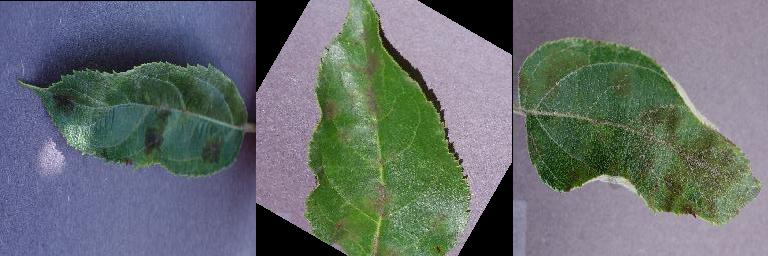

In [ ]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

# Définir le chemin du dossier
path_folder = "/content/drive/MyDrive/Dataset_projet/Maladie sur les plantes/New Plant Diseases/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab"

# Récupérer les noms des fichiers d'images dans le dossier
img_files = os.listdir(path_folder)[:3] # les 3 premières images seulement


# Créer une liste vide pour stocker les images
images = []

# Charger chaque image dans la liste
for file in img_files:
    img_path = os.path.join(path_folder, file)
    img = cv2.imread(img_path)
    images.append(img)

# Créer une image noire pour servir de fond
height, width, channels = images[0].shape
background = np.zeros((height, width * 3, channels), dtype=np.uint8)

# Ajouter chaque image à la ligne de fond noir
for i in range(len(images)):
    x_offset = i * width
    y_offset = 0
    background[y_offset:y_offset+height, x_offset:x_offset+width] = images[i]

# Afficher la ligne d'images
cv2_imshow(background)
cv2.waitKey(0)
cv2.destroyAllWindows()

Septième test

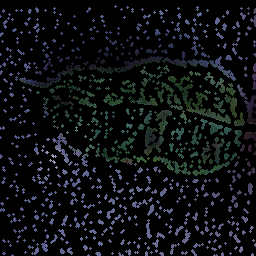

In [ ]:
# retirer le background automatiquement

import cv2
from google.colab.patches import cv2_imshow

path_folder = "/content/drive/MyDrive/Dataset_projet/Maladie sur les plantes/New Plant Diseases/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab"
images_list = os.listdir(path_folder)[:1]

for image_name in images_list:
    # Chargement de l'image
    image = cv2.imread(os.path.join(path_folder, image_name))

    # Convertir l'image en niveaux de gris
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Appliquer un seuillage adaptatif pour obtenir un masque binaire de l'image
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

    # Appliquer une opération de morphologie pour éliminer les petits trous dans le masque binaire
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    mask = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

    # Appliquer le masque binaire à l'image d'origine pour retirer le fond
    result = cv2.bitwise_and(image, image, mask=mask)

    # Afficher le résultat
    cv2_imshow(result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Huitième test

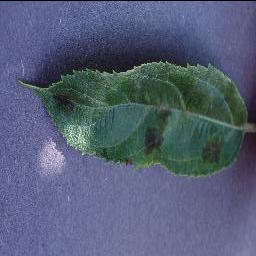

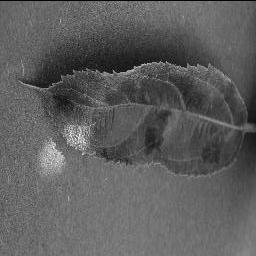

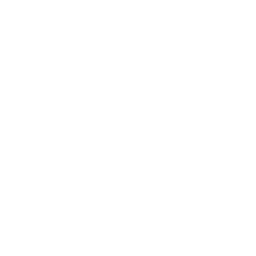

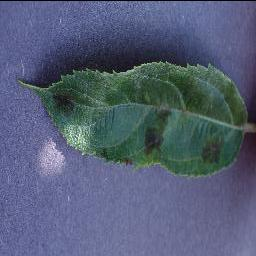

In [ ]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

path_folder = "/content/drive/MyDrive/Dataset_projet/Maladie sur les plantes/New Plant Diseases/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab"
images_list = os.listdir(path_folder)[:1]

for image_name in images_list:
    # Chargement de l'image
    img = cv2.imread(os.path.join(path_folder, image_name))

    # Conversion en niveaux de gris
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Seuil de l'image en entrée pour obtenir un masque
    mask = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)[1]

    # Inversion du masque
    mask = 255 - mask

    # Application de la morphologie pour supprimer les bruits isolés
    # Utilisation d'un bord noir car le premier plan touche les bords
    kernel = np.ones((3, 3), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # Antialiasing du masque : floutage puis étirement
    # Floutage du canal alpha
    mask = cv2.GaussianBlur(mask, (0, 0), sigmaX=2, sigmaY=2, borderType=cv2.BORDER_DEFAULT)

    # Étirement linéaire pour que 127.5 devienne 0, mais que 255 reste 255
    mask = (2 * (mask.astype(np.float32)) - 255.0).clip(0, 255).astype(np.uint8)

    # Insertion du masque dans le canal alpha
    resultat = img.copy()
    resultat = cv2.cvtColor(resultat, cv2.COLOR_BGR2BGRA)
    resultat[:, :, 3] = mask

    # Sauvegarde de l'image masquée résultante
    cv2.imwrite(f"{image_name[:-4]}_transp_bckgrnd.png", resultat)

    # Affichage du résultat, bien que la transparence ne soit pas visible
    cv2_imshow(img)
    cv2_imshow(gray)
    cv2_imshow(mask)
    cv2_imshow(resultat)
    cv2.waitKey(0)

cv2.destroyAllWindows()

# Détection des formes


1.  détecter les bords des objets ou des formes dans une image avec la fonction cv2.findContours() de la bibliothèque OpenCV

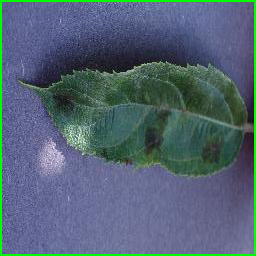

In [ ]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

path_folder = "/content/drive/MyDrive/Dataset_projet/Maladie sur les plantes/New Plant Diseases/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab"
images_list = os.listdir(path_folder)[:1]

for image_name in images_list:
    # Chargement de l'image
    img = cv2.imread(os.path.join(path_folder, image_name))

    # Conversion en niveaux de gris
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Seuil de l'image en entrée pour obtenir un masque
    mask = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)[1]

    # Inversion du masque
    mask = 255 - mask

    # Application de la morphologie pour supprimer les bruits isolés
    # Utilisation d'un bord noir car le premier plan touche les bords
    kernel = np.ones((3, 3), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # Antialiasing du masque : floutage puis étirement
    # Floutage du canal alpha
    mask = cv2.GaussianBlur(mask, (0, 0), sigmaX=2, sigmaY=2, borderType=cv2.BORDER_DEFAULT)

    # Étirement linéaire pour que 127.5 devienne 0, mais que 255 reste 255
    mask = (2 * (mask.astype(np.float32)) - 255.0).clip(0, 255).astype(np.uint8)

    # Insertion du masque dans le canal alpha
    resultat = img.copy()
    resultat = cv2.cvtColor(resultat, cv2.COLOR_BGR2BGRA)
    resultat[:, :, 3] = mask

    # Détection de contours
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Dessin des contours sur l'image d'origine
    cv2.drawContours(img, contours, -1, (0, 255, 0), 2)

    # Affichage du résultat
    cv2_imshow(img)
    cv2.waitKey(0)

cv2.destroyAllWindows()

2. détecter des bords fins et précis même en présence de bruit dans une image avec la méthode Canny

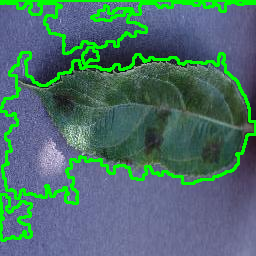

In [ ]:
import cv2
import numpy as np

path_folder = "/content/drive/MyDrive/Dataset_projet/Maladie sur les plantes/New Plant Diseases/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab"
images_list = os.listdir(path_folder)[:1]

for image_name in images_list:
    # Chargement de l'image
    img = cv2.imread(os.path.join(path_folder, image_name))

# Conversion en niveaux de gris
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Détection de contours de Canny
canny = cv2.Canny(gray, 40, 210)                               #(gray, 50, 200)

# Dilatation des contours
kernel = np.ones((5,5),np.uint8)
dilated = cv2.dilate(canny, kernel, iterations=1)

# Recherche des contours
contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dessin des contours sur l'image originale
img_contours = cv2.drawContours(img, contours, -1, (0, 255, 0), 2)

# Affichage de l'image avec les contours
from google.colab.patches import cv2_imshow
cv2_imshow(img_contours)

3. détecter la forme pour la détection de cercles : la transformée de Hough

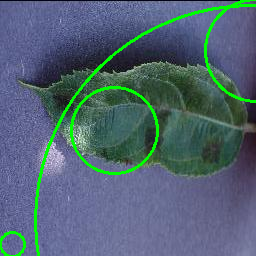

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

path_folder = "/content/drive/MyDrive/Dataset_projet/Maladie sur les plantes/New Plant Diseases/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab"
images_list = os.listdir(path_folder)[:1]

for image_name in images_list:
    # Chargement de l'image
    img = cv2.imread(os.path.join(path_folder, image_name))

# Conversion en niveaux de gris
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Détection de cercles avec la transformée de Hough
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 150, param1=50, param2=30, minRadius=0, maxRadius=0)      # (gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)

# Dessin des cercles détectés sur l'image d'origine
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(img, (x, y), r, (0, 255, 0), 2)

# Affichage de l'image avec les cercles détectés
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

4. détecter la forme : transformée de Hough pour les cercles combinée avec le filtre de Canny pour détecter les contours de l'image

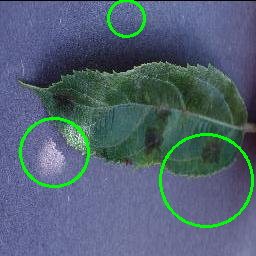

In [ ]:
from google.colab.patches import cv2_imshow

path_folder = "/content/drive/MyDrive/Dataset_projet/Maladie sur les plantes/New Plant Diseases/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab"
images_list = os.listdir(path_folder)[:1]

for image_name in images_list:
    # Chargement de l'image
    img = cv2.imread(os.path.join(path_folder, image_name))

# Conversion en niveaux de gris
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Application du filtre de Canny
edges = cv2.Canny(gray, 2, 20, apertureSize=3)

# Détection de cercles avec la transformée de Hough
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1, minDist=150, param1=50, param2=20, minRadius=0, maxRadius=0)
#(edges, cv2.HOUGH_GRADIENT, dp=1, minDist= 100, param1=50, param2=30, minRadius=0, maxRadius=0)

# Dessin des cercles détectés sur l'image originale
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(img, (x, y), r, (0, 255, 0), 2)

# Affichage de l'image avec les cercles détectés
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

5. détecter les cercles dans une image avec les cercles de Hough convertie en niveaux de gris, puis floutée , suivi par la détection de contours avec Canny et la dilatation des contours (dilate)

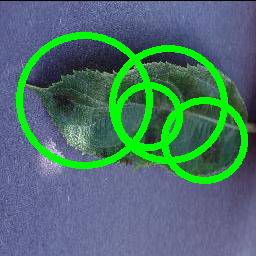

In [ ]:
import cv2
import numpy as np

from google.colab.patches import cv2_imshow

path_folder = "/content/drive/MyDrive/Dataset_projet/Maladie sur les plantes/New Plant Diseases/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab"
images_list = os.listdir(path_folder)[:1]

for image_name in images_list:
    # Chargement de l'image
    img = cv2.imread(os.path.join(path_folder, image_name))

# Conversion en niveaux de gris
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Réduction des bruits
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Détection de contours de Canny
canny = cv2.Canny(blur, 50, 2)

# Dilatation des contours
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(canny,kernel,iterations = 1)

# Détection de cercles avec HoughCircles
circles = cv2.HoughCircles(dilation, cv2.HOUGH_GRADIENT, 1, 20,
                           param1=50, param2=30, minRadius=0, maxRadius=0)

# Affichage des cercles détectés
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(img, (x, y), r, (0, 255, 0), 5)

# Affichage de l'image avec les cercles détectés
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

6. détecter la segmentation d'une image pour extraire un objet en premier plan, en utilisant la méthode de seuillage et la morphologie mathématique

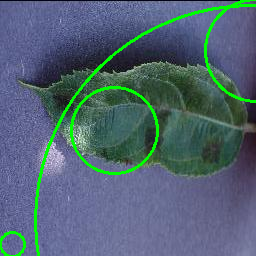

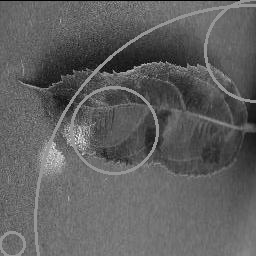

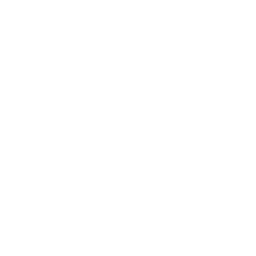

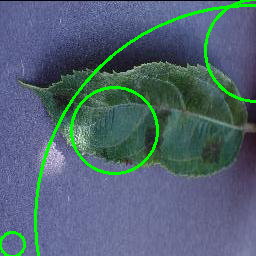

In [ ]:
import cv2
import numpy as np

path_folder = "/content/drive/MyDrive/Dataset_projet/Maladie sur les plantes/New Plant Diseases/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab"
images_list = os.listdir(path_folder)[:1]

for image_name in images_list:
    # Chargement de l'image
    image = cv2.imread(os.path.join(path_folder, image_name))

    # conversion en niveaux de gris
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # seuil de l'image en entrée pour obtenir un masque
    mask = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)[1]

    # inversion du masque
    mask = 255 - mask

    # application de la morphologie pour éliminer le bruit extraneous isolé
    # utilisation de borderconstant noir car le premier plan touche les bords
    kernel = np.ones((3,3), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # anti-aliasing du masque -- flou puis étirement
    # floutage du canal alpha
    mask = cv2.GaussianBlur(mask, (0,0), sigmaX=2, sigmaY=2, borderType = cv2.BORDER_DEFAULT)

    # étirement linéaire de telle sorte que 127,5 passe à 0, mais 255 reste à 255
    mask = (2*(mask.astype(np.float32))-255.0).clip(0,255).astype(np.uint8)

    # mettre le masque dans le canal alpha
    result = img.copy()
    result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
    result[:, :, 3] = mask

    # enregistrer l'image masquée résultante
    cv2.imwrite('person_transp_bckgrnd.png', result)


    # afficher le résultat, même si la transparence ne sera pas visible
    cv2_imshow(img)
    cv2_imshow(gray)
    cv2_imshow(mask)
    cv2_imshow(result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [18]:
import nbformat as nbf

# Charger le notebook actuel en utilisant l'encodage 'utf-8'
with open('Exploration_et_visualisation_New_Plant_Diseases_Dataset.ipynb', 'r', encoding='utf-8') as f:
    notebook = nbf.read(f, as_version=nbf.NO_CONVERT)

# Récupérer les cellules à partir de la 11e cellule de code
split_cells_1 = notebook['cells'][:20]

# Créer le premier notebook fractionné
split_notebook_1 = nbf.v4.new_notebook(cells=split_cells_1[:])

# Enregistrer le premier notebook fractionné
with open('Exploration - 1.ipynb', 'w', encoding='utf-8') as f:
    nbf.write(split_notebook_1, f)

# Récupérer les cellules à partir de la 17e cellule de code
split_cells_2 = notebook['cells'][20:]

# Créer le deuxième notebook fractionné
split_notebook_2 = nbf.v4.new_notebook(cells=split_cells_2[:])

# Enregistrer le deuxième notebook fractionné
with open('Exploration - 2.ipynb', 'w', encoding='utf-8') as f:
    nbf.write(split_notebook_2, f)